# 3. Exploratory Data Analysis

## Imports

In [1]:
#Import required modules

import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.dates as mdates

from pathlib import Path

import ppscore as pps

## Custom Functions

In [2]:
def count_over_thershold(li, bounding_limit: tuple):
    '''This function gets a list and print how many items are larger than a thersold'''
    
    #counters
    n = len(li)
    m = 0    
    for i in li:
        if i >= bounding_limit[1] or i < bounding_limit[0] :
            m +=1
    pct = 100.0*m/n
    print(f'{pct:1.2f}% of items ({m}/{n}) are out of {bounding_limit}')   

In [3]:
def plot_corr_matrix (df, mask = False):
    '''This function plots Correlation matrix'''
    
    # Compute the correlation matrix
    corr = df.corr()
    
    #Plot Corr matrix
    
    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin = -1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Pearson Correlation Matrix')

    plt.show()

In [4]:
def plot_pps_matrix(df, mask = False):
    '''This function gets a df and plot PPS score matrix'''
    
    # Compute the PPS matrix
    matrix = pps.matrix(df)

    #Plot PPS
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(matrix_pps, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(matrix_pps, mask = mask, cmap="Blues", vmin = 0, vmax=1, center=0.5,
                square=True, linewidths=.5,annot=False, cbar_kws={"shrink": .5}).set(title='PPS Matrix')
    plt.show()


In [5]:
def highlight_out_of_range(data, bounding_limit: tuple):
    '''This functions gets PPS score for target feature and plot a bar plot'''
    lower_bound = bounding_limit[0]
    upper_bound = bounding_limit[1]
    
    #Plot the scores for a select feature from PPS Matrix
    data= data.sort_values(ascending = False)

    #The value > thershold will be show with a different color.
    #So, the plot colors will be dynamically set based on the data

    #Create and empty list of colors
    colors = []

    #Set color for ratio values
    #Set "red" if value is max, otherwise "blue" (as default)
    for index, value in data.items():
        if value >= upper_bound or value <= lower_bound:
            colors.append('#f77088') #red for max
        else:
            colors.append('#66aabb') #blue as default

    #set chart size
    fig = plt.figure(figsize = (15, 2))


    #Pass the x and height values with color set to bar plotter
    plt.bar(data.index,data.values, width = .8, color=colors)

    #Rotate the x labels for better visuzlaizarion
    plt.xticks(rotation=90)

    #Set labels
    plt.ylabel('PPS score')
    
    
    count_over_thershold(data, bounding_limit)

    #Show the plot
    plt.show()

In [6]:
def target_pps_score(df, feature):
    # Compute the PPS matrix
    matrix = pps.matrix(df)
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    y_scores = matrix_pps[feature]
    
    return y_scores

In [7]:
def target_corr_coeff(df, feature):
    
    # Compute the correlation matrix
    corr = df.corr()
    y_scores = corr[feature]
    
    return y_scores

In [8]:
# define useful function to create scatterplots of crude oil prices against desired columns
def plot_scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
        
    nrow = int(np.ceil(len(columns) / ncol))
    
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=1)
    
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'WTI_Price', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='WTI_Price')
        
    nsubplots = nrow * ncol
    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

## Read Data

In [9]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01


In [10]:
#Define file name and location
dataset_csv = 'merged_eia_fred_offile.csv'
path = '\\data\\interim\\'
f = ROOT_DIR + path + dataset_csv
print(f)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01\data\interim\merged_eia_fred_offile.csv


In [11]:
df = pd.read_csv(f)

In [12]:
#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)

## Data explorotary

### Check dataframe

In [13]:
display(df.head().T)

Date,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01
WTI_Price,29.366000,29.842000,25.722000,28.788000,31.822000
Oil_Production_OPEC,26.675516,26.608782,27.516678,28.048591,27.639380
Oil_Production_nonOPEC,46.822508,46.937266,46.618731,46.623961,46.778141
Oil_Production_World,74470.542507,74439.049968,75116.129376,75639.562523,75360.217843
Henry_Hub_NG_Price,2.660000,2.790000,3.040000,3.590000,4.290000
Oil_Production_US,5.851839,5.918207,5.854166,5.846510,5.822882
Petrol_Consumption_OECD,50.229341,49.358083,46.286749,47.338795,47.955820
Petrol_Consumption_nonOECD,28.770679,28.528547,28.131882,28.216862,28.270995
US_CPI,1.700000,1.710000,1.709000,1.712000,1.722000
US_PPI,1.299187,1.305372,1.311693,1.317793,1.323801


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2000-02-01 to 2022-06-01
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WTI_Price                             269 non-null    float64
 1   Oil_Production_OPEC                   269 non-null    float64
 2   Oil_Production_nonOPEC                269 non-null    float64
 3   Oil_Production_World                  269 non-null    float64
 4   Henry_Hub_NG_Price                    269 non-null    float64
 5   Oil_Production_US                     269 non-null    float64
 6   Petrol_Consumption_OECD               269 non-null    float64
 7   Petrol_Consumption_nonOECD            269 non-null    float64
 8   US_CPI                                269 non-null    float64
 9   US_PPI                                269 non-null    float64
 10  US_PPI_Petroleum                      269 non-null    float64
 11  

### Traget feature

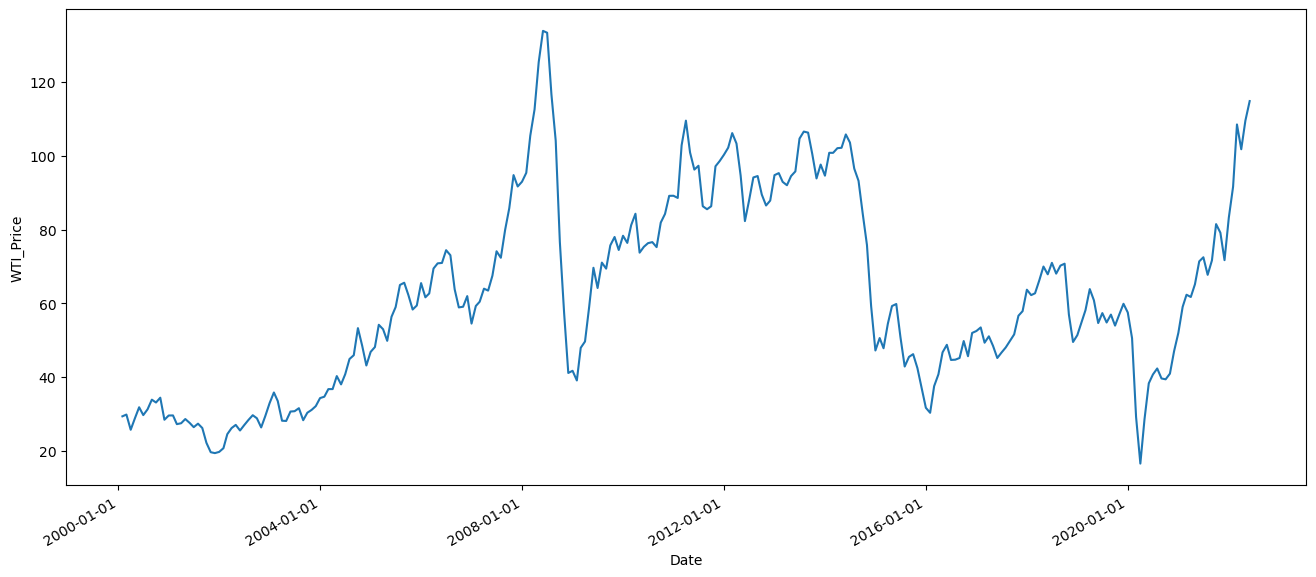

In [15]:
#Plot the target feature
fig, ax = plt.subplots(figsize = (16,7))
sns.lineplot(data = df, x = df.index, y = 'WTI_Price')

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

### Histograms

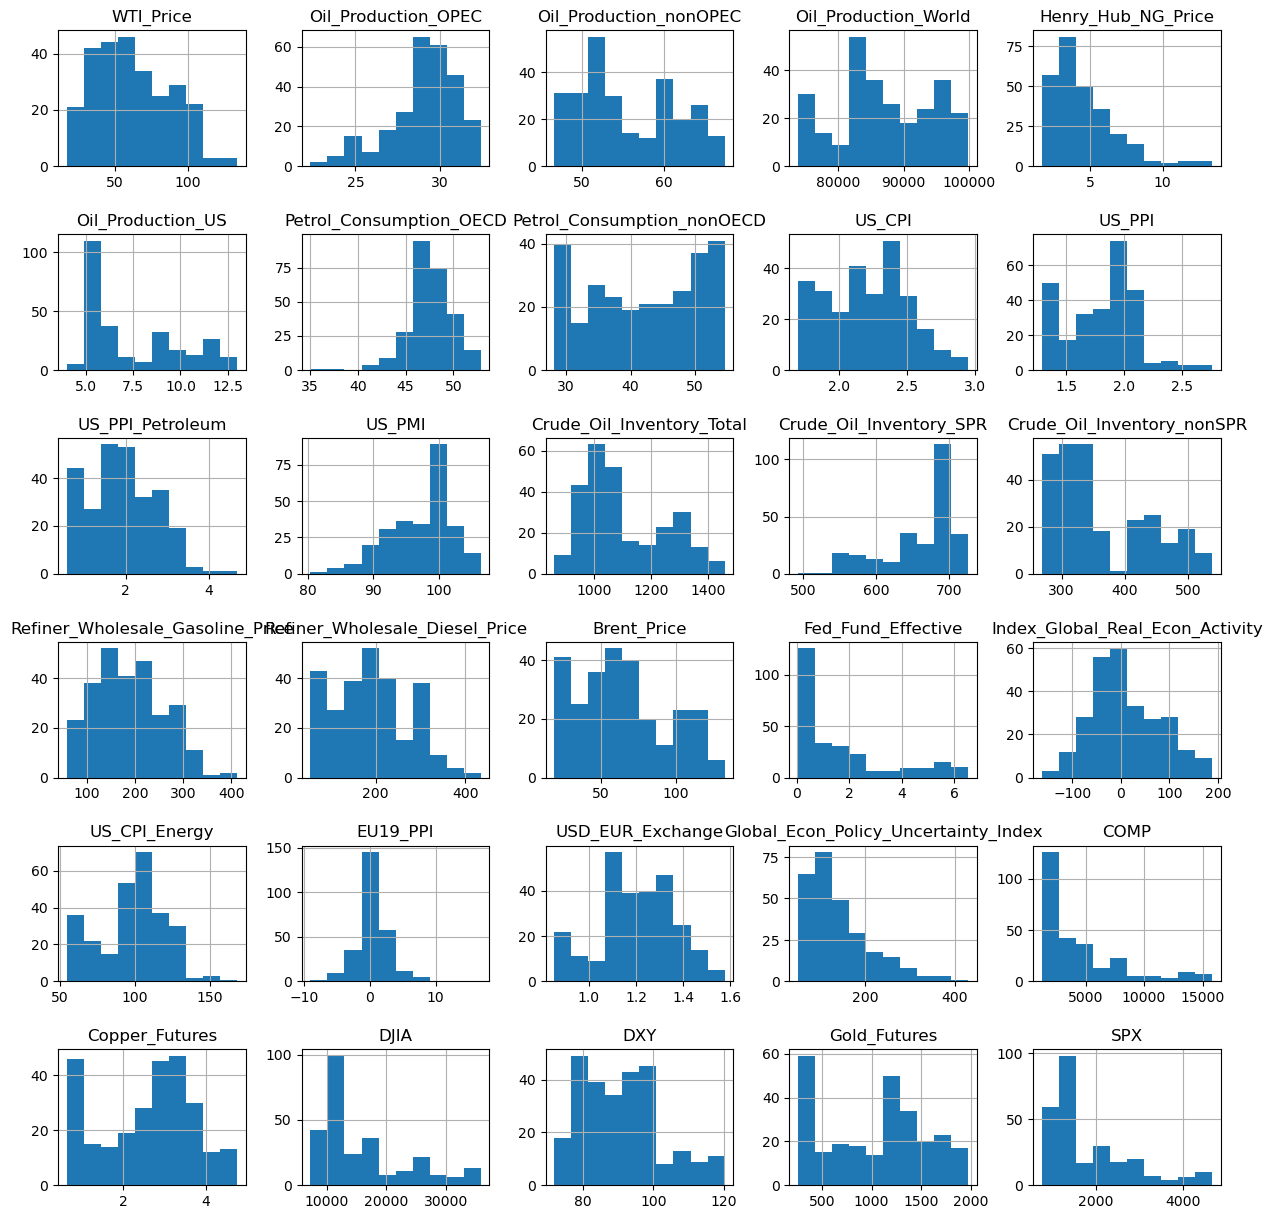

In [16]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

### Correlation matrix

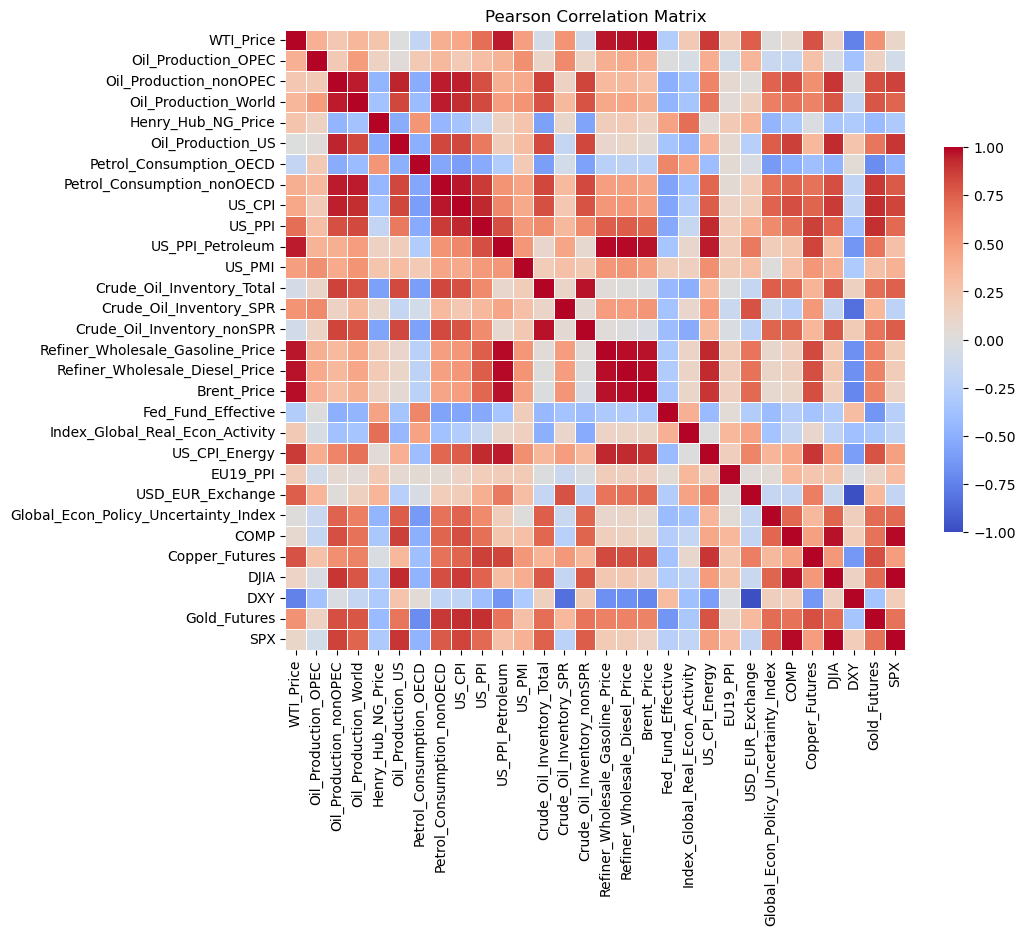

In [17]:
plot_corr_matrix(df, False)

### PPS: Predictive Power Score

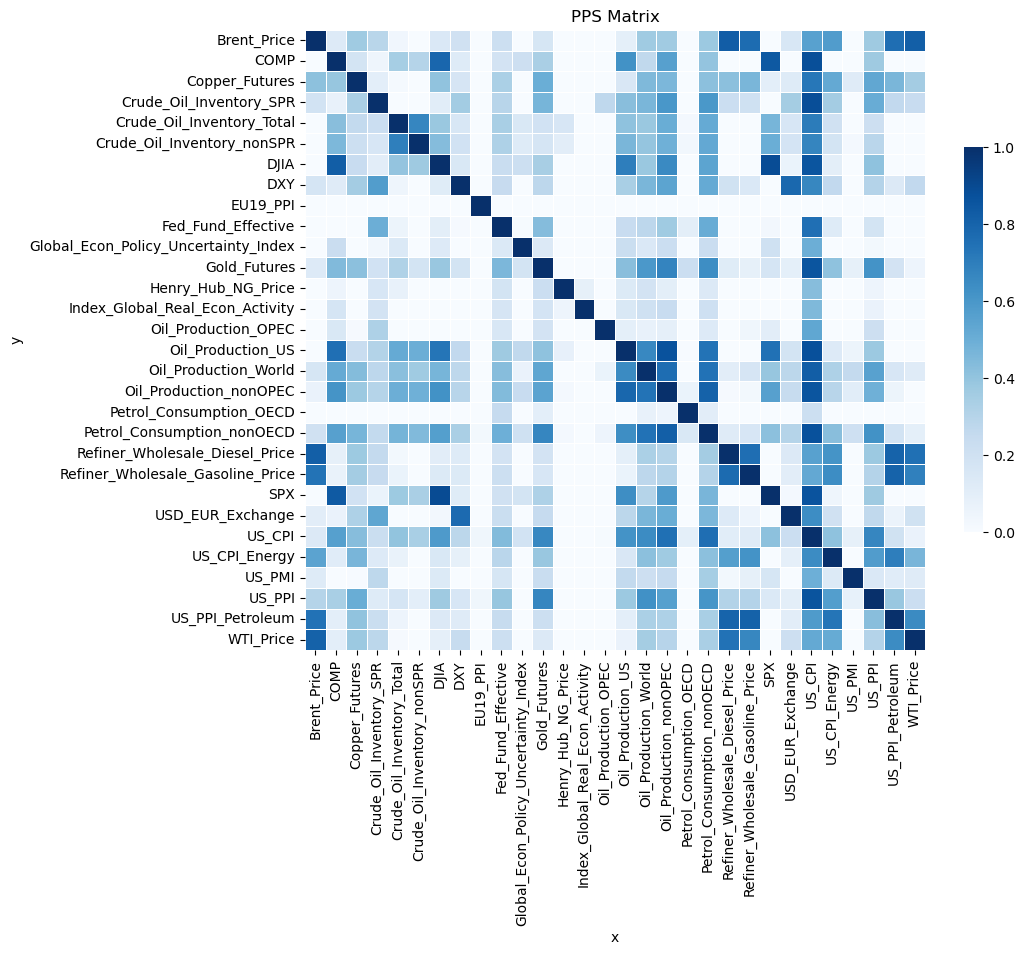

In [18]:
plot_pps_matrix(df, False)

### Scatter Plots

In [19]:
#define features to be plotted against WTI price
features = [item for item in df.columns if item not in ['WTI_Price']]

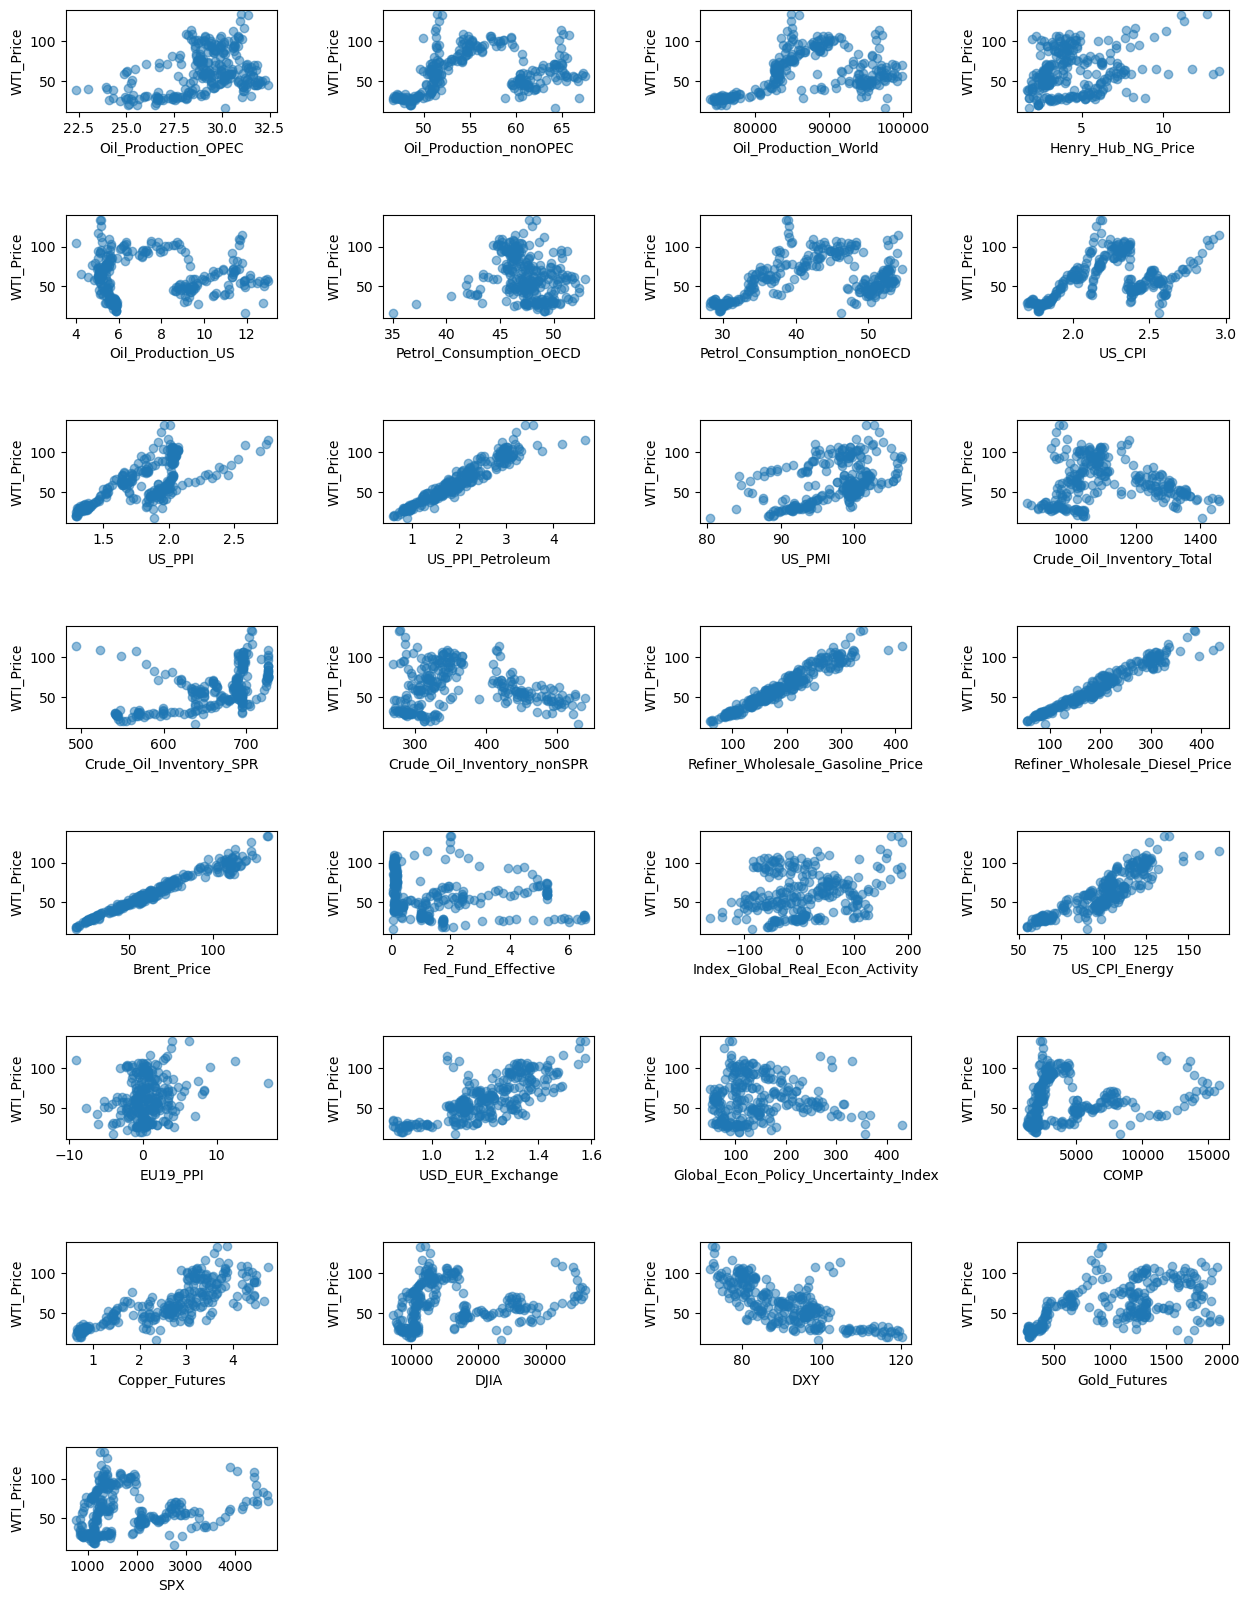

In [20]:
plot_scatterplots(df, features, ncol=4, figsize=(15, 20))

## Feature Engineering

### Add price spread features

In [ ]:
# Calcualte additioanl features.
df['WTI_Brent_Price_Spread'] = df['WTI_Price'] - df['Brent_Price']
df['WTI_Crack_Spread'] = 2*df['Refiner_Wholesale_Gasoline_Price'] + df['Refiner_Wholesale_Diesel_Price'] - 3*df['WTI_Price']
df['Brent_Crack_Spread'] = 2*df['Refiner_Wholesale_Gasoline_Price'] + df['Refiner_Wholesale_Diesel_Price'] - 3*df['Brent_Price']

# Drop unnecessary columns
df = df.drop(columns=['Brent_Price', 'Refiner_Wholesale_Gasoline_Price', 'Refiner_Wholesale_Diesel_Price'])

### Look for PPS score assosciation with target feature

In [ ]:
wti_pps_score = target_pps_score(df, 'WTI_Price')

In [ ]:
highlight_out_of_range(wti_pps_score, (0,0.6))

### Look for correlation coeff

In [ ]:
wti_corr_coeff = target_corr_coeff(df, 'WTI_Price')

In [ ]:
highlight_out_of_range(wti_corr_coeff, (-0.6,0.6))

## Store the data

In [ ]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Change direcotry to the 'data\raw' folder
path = ROOT_DIR + '\\data\\interim\\'

# Set a file name
file_save = path + 'crude_oil_price_step3_features.csv'
df.to_csv(file_save)

print('Save:\n', file_save)